In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import isbnlib
from newspaper import Article
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm
from progressbar import ProgressBar
import re
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import goodreads_api_client as gr
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/drive/MyDrive/bookfinal/book_final_data.csv', error_bad_lines = False)


In [4]:
df.head()

,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,Summary,Language,Category,city,state,country
0,11676,34,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],unknown,unknown,unknown
1,116866,34,0002005018,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,",",unknown
2,110912,36,0374157065,10,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,"Describes the great flu epidemic of 1918, an o...",en,['Medical'],milpitas,california,usa
3,197659,49,0374157065,9,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,"Describes the great flu epidemic of 1918, an o...",en,['Medical'],indiana,pennsylvania,usa
4,11676,34,0399135782,9,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,A Chinese immigrant who is convinced she is dy...,en,['Fiction'],unknown,unknown,unknown


In [5]:
#Finding Number of rows and columns
print("Dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

Dataset contains 153428 rows and 14 columns


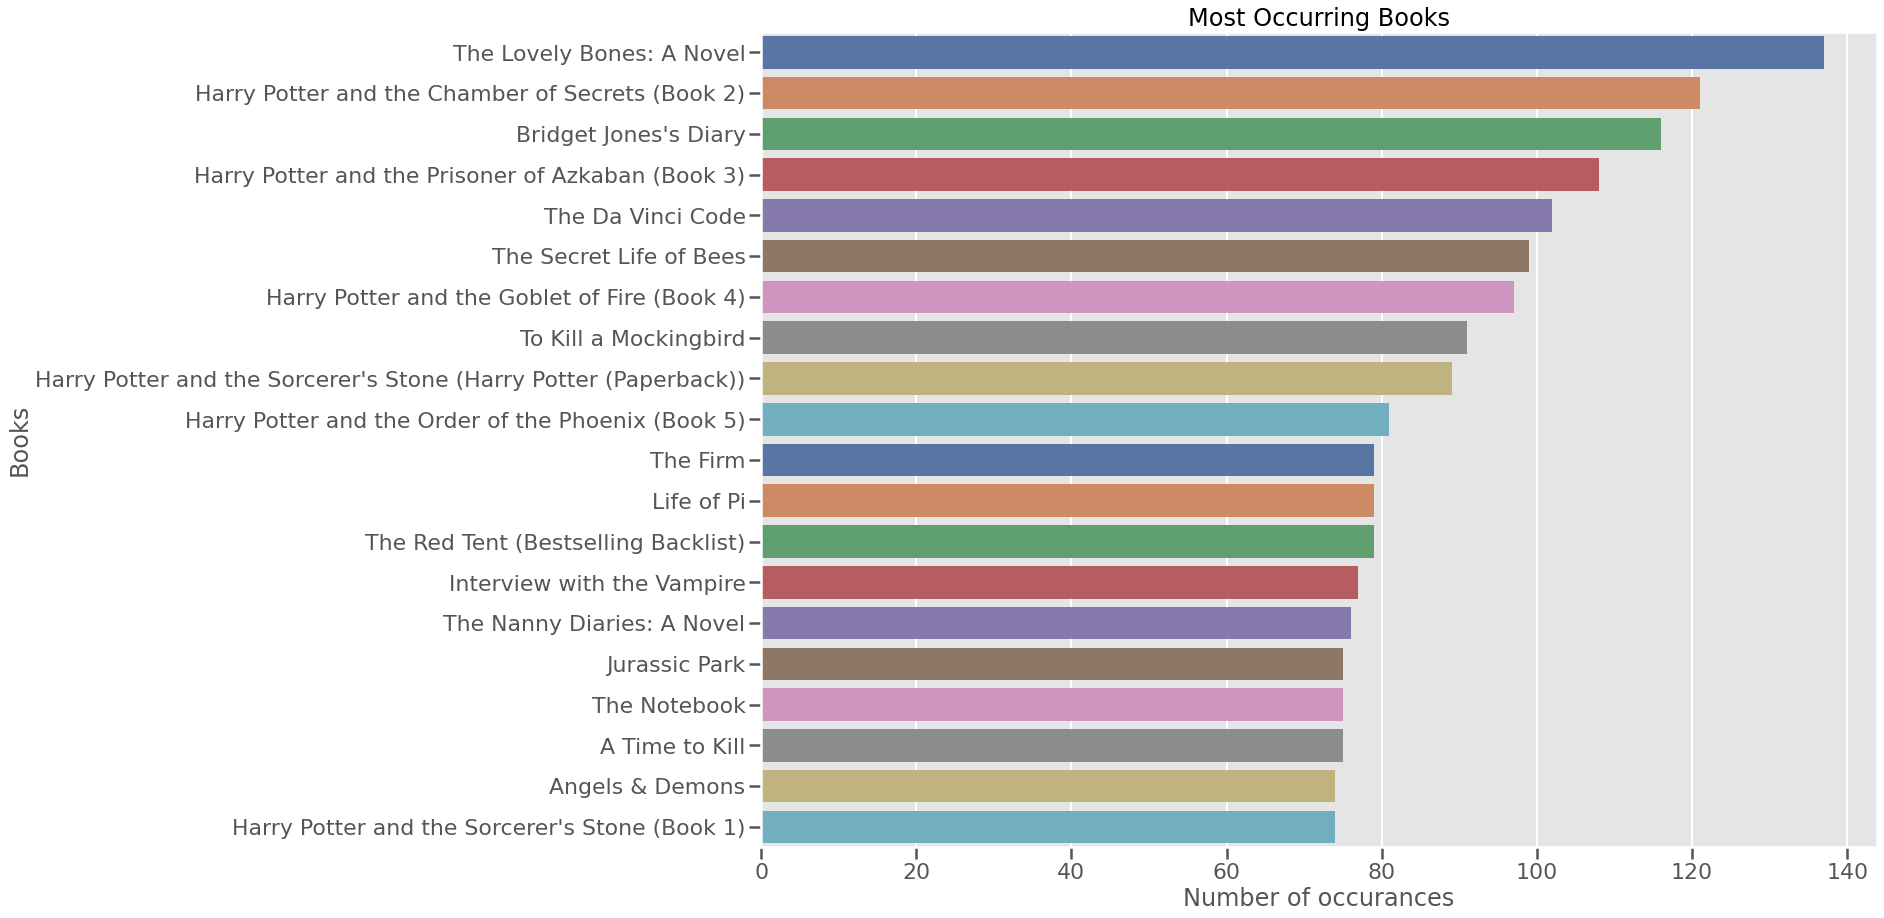

In [6]:

#Taking the first 20:

sns.set_context('poster')
plt.figure(figsize=(20,15))
books = df['book_title'].value_counts()[:20]
rating = df.rating[:20]
sns.barplot(x = books, y = books.index, palette='deep')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

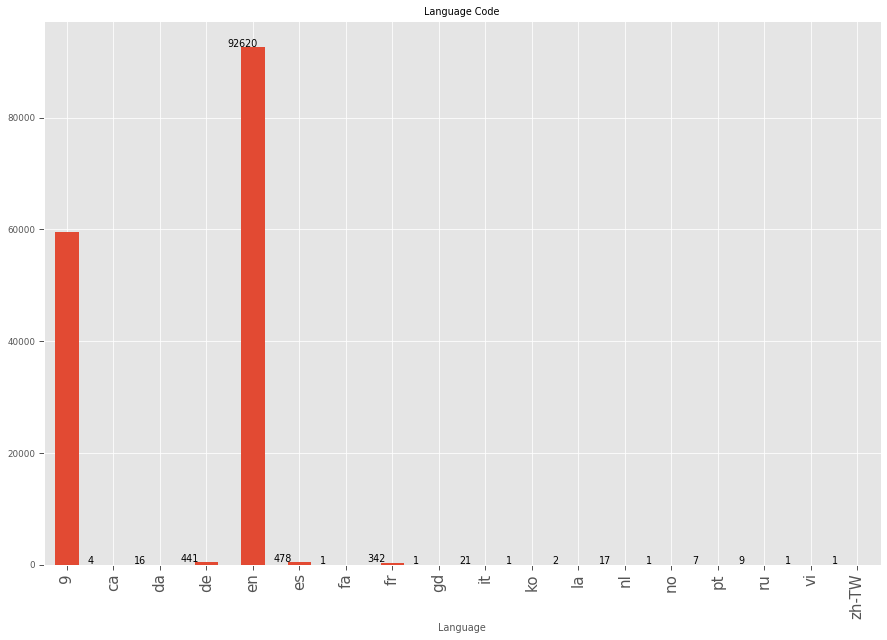

In [7]:
sns.set_context('paper')
plt.figure(figsize=(15,10))
ax = df.groupby('Language')['book_title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

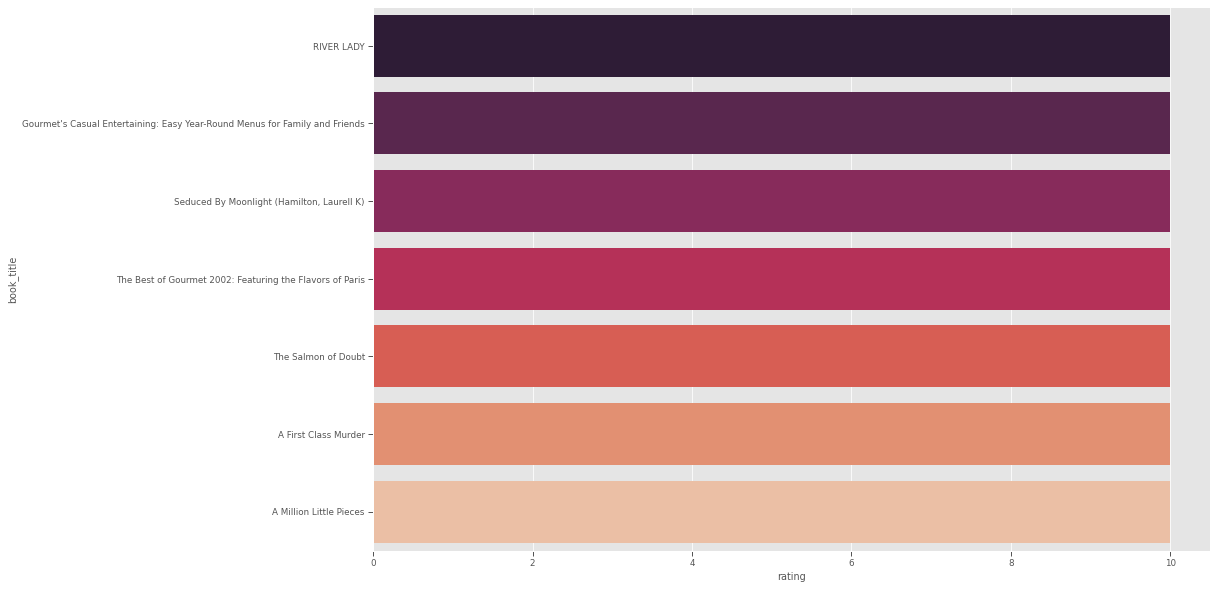

In [8]:

most_rated = df.sort_values('rating', ascending = False).head(10).set_index('book_title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['rating'], most_rated.index, palette='rocket')

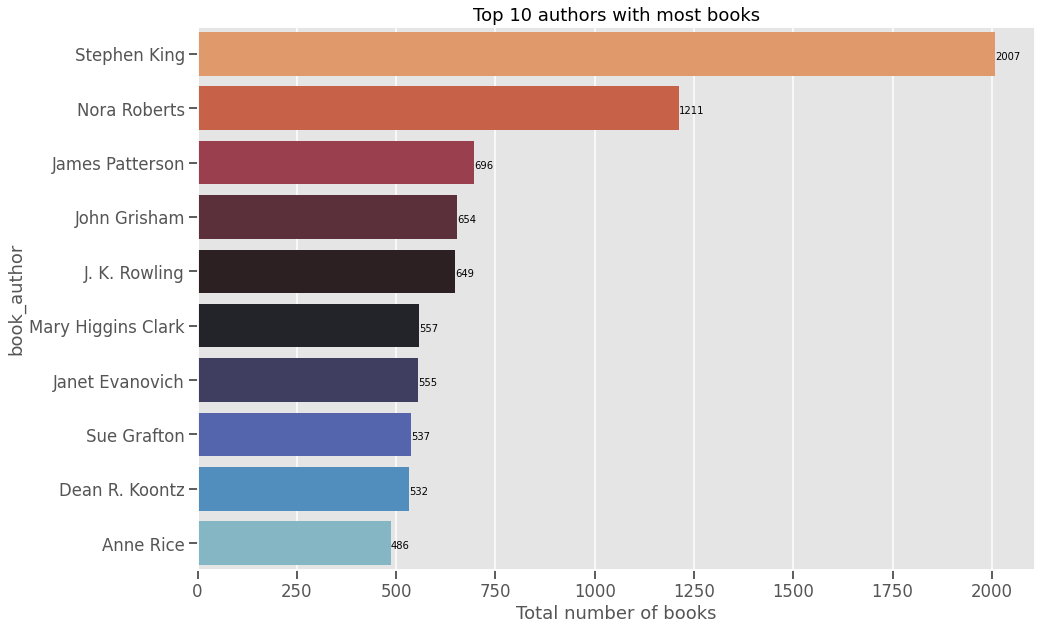

In [9]:
sns.set_context('talk')
most_books = df.groupby('book_author')['book_title'].count().reset_index().sort_values('book_title', ascending=False).head(10).set_index('book_author')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['book_title'], most_books.index, palette='icefire_r')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

In [10]:
#Finding the top 15 authors with the most number of books
df['book_author'].value_counts().head(10)

Stephen King          2007
Nora Roberts          1211
James Patterson        696
John Grisham           654
J. K. Rowling          649
Mary Higgins Clark     557
Janet Evanovich        555
Sue Grafton            537
Dean R. Koontz         532
Anne Rice              486
Name: book_author, dtype: int64

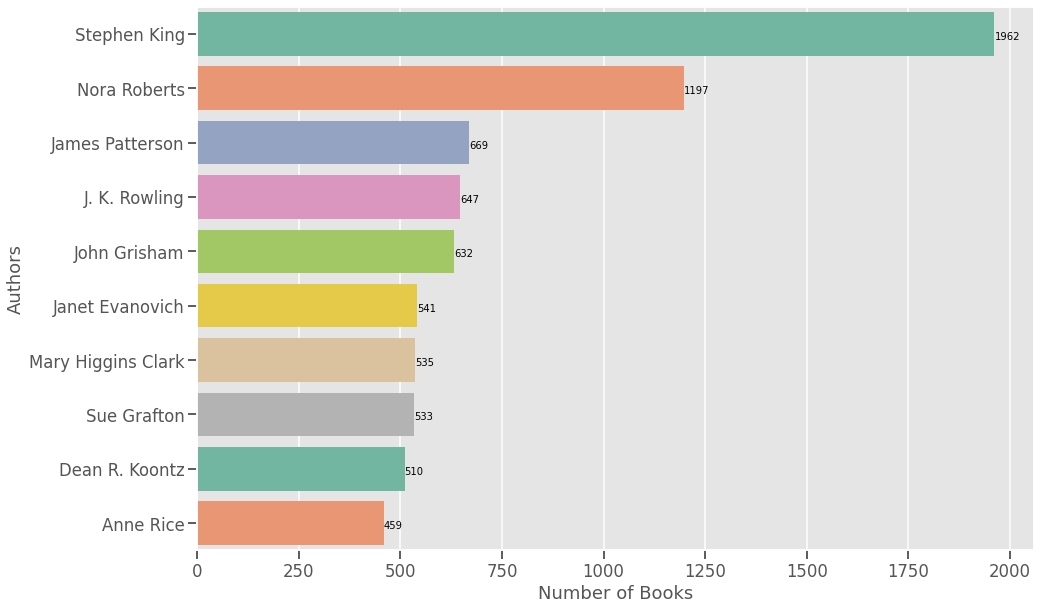

In [11]:
high_rated_author = df[df['rating']>=4.3]
high_rated_author = high_rated_author.groupby('book_author')['book_title'].count().reset_index().sort_values('book_title', ascending = False).head(10).set_index('book_author')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['book_title'], high_rated_author.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

In [12]:
def segregation(data):
    values = []
    for val in data.rating:
        if val>=0 and val<=1:
            values.append("Between 0 and 1")
        elif val>1 and val<=2:
            values.append("Between 1 and 2")
        elif val>2 and val<=3:
            values.append("Between 2 and 3")
        elif val>3 and val<=4:
            values.append("Between 3 and 4")
        elif val>4 and val<=5:
            values.append("Between 4 and 5")
        else:
            values.append("NaN")
    print(len(values))
    return values


In [13]:
df.rating.isnull().value_counts()


False    153428
Name: rating, dtype: int64

In [14]:
df.dropna(0, inplace=True)
#Removing Any null values

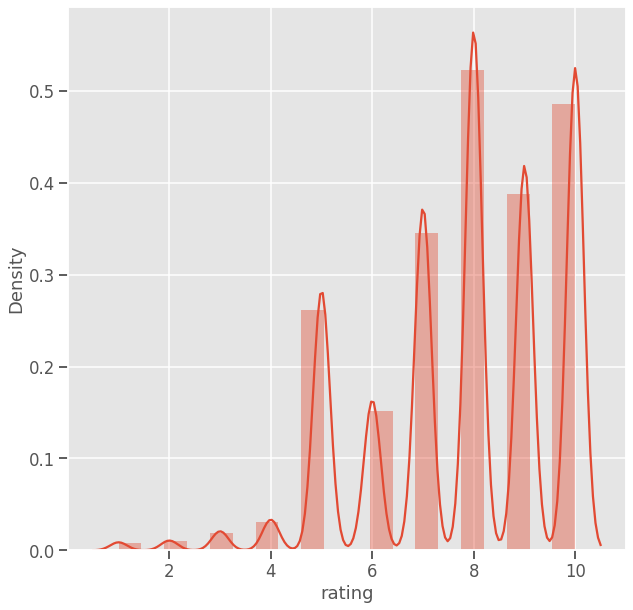

In [15]:
plt.figure(figsize=(10,10))
rating= df.rating.astype(float)
sns.distplot(rating, bins=20)

153428


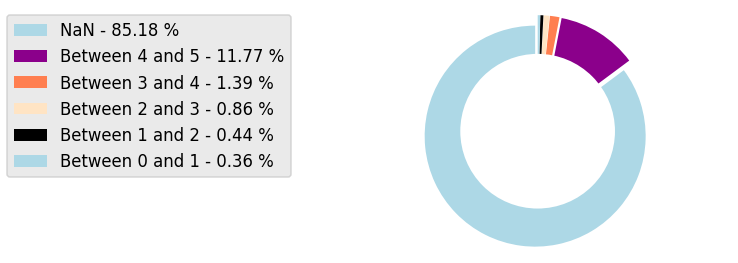

In [16]:
df['Ratings_Dist'] = segregation(df)
ratings_pie = df['Ratings_Dist'].value_counts().reset_index()
labels = ratings_pie['index']
colors = ['lightblue','darkmagenta','coral','bisque', 'black']
percent = 100.*ratings_pie['Ratings_Dist']/ratings_pie['Ratings_Dist'].sum()
fig, ax1 = plt.subplots()
ax1.pie(ratings_pie['Ratings_Dist'],colors = colors, 
        pctdistance=0.85, startangle=90, explode=(0.05, 0.05, 0.05, 0.05, 0.05,0.05))
#Draw a circle now:
centre_circle = plt.Circle((0,0), 0.70, fc ='white')
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
#Equal Aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
plt.legend( labels, loc = 'best',bbox_to_anchor=(-0.1, 1.),)